## Setup

* Loading libraries
* Data imports

In [1]:
import os
import csv
import urllib.request
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#For fetching train data 
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/dataqueenpend/Projects-/main/"
PATH = os.path.join("Titanic - Survivcal Analysis and Predictions", "datasets")
URL = DOWNLOAD_ROOT + "Titanic%20-%20Survivcal%20Analysis%20and%20Predictions/datasets/train.csv"
NAME = 'train.csv'

In [3]:
#Fetching train data
def fetch_data(url=URL, path=PATH, name=NAME):
    os.makedirs(path, exist_ok=True)
    path_csv = os.path.join(path, name)
    urllib.request.urlretrieve(url, path_csv)
    data_csv = pd.read_csv(path_csv)
    return data_csv

In [4]:
train = fetch_data()

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#For fetching test data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/dataqueenpend/Projects-/main/"
PATH = os.path.join("Titanic - Survivcal Analysis and Predictions", "datasets")
URL = DOWNLOAD_ROOT + "Titanic%20-%20Survivcal%20Analysis%20and%20Predictions/datasets/test.csv"
NAME = 'test.csv'

In [7]:
#Fetching test data
def fetch_data(url=URL, path=PATH, name=NAME):
    os.makedirs(path, exist_ok=True)
    path_csv = os.path.join(path, name)
    urllib.request.urlretrieve(url, path_csv)
    data_csv = pd.read_csv(path_csv)
    return data_csv

In [8]:
#Fetching test data
test = fetch_data(name=NAME)

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
#For fetching sample submission data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/dataqueenpend/Projects-/main/"
PATH = os.path.join("Titanic - Survivcal Analysis and Predictions", "datasets")
URL = DOWNLOAD_ROOT + "Titanic%20-%20Survivcal%20Analysis%20and%20Predictions/datasets/gender_submission.csv"
NAME = 'gender_submission.csv'

In [11]:
#Fetching sample submission data
def fetch_data(url=URL, path=PATH, name=NAME):
    os.makedirs(path, exist_ok=True)
    path_csv = os.path.join(path, name)
    urllib.request.urlretrieve(url, path_csv)
    data_csv = pd.read_csv(path_csv)
    return data_csv

In [12]:
#Fetching sample submission data
sample = fetch_data()

In [13]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


All data will be fetched automatically from the provided url. No need to load it manually everytime. 
---

Let's take a look at the data. We saw some interesting things already...

## Exploratory Data Analysis

We've already took a glimpse of the data, while checking the loads, and it seems that Cabin columns is almost non existing in the test data. Of course we shouldn't dwell too much on the test set (in case of being influenced by the findings - the best practice is, expecially in projects, to put out our test data from our eyes absolutely). But in this case - Kaggle Competition - we can take a little glimpse. 


### Dropping ID columnns from train and test set

In [14]:
train.drop('PassengerId', inplace=True, axis=1)

In [15]:
test.drop('PassengerId', inplace=True, axis=1)

### Overall look and data description

In [16]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
train.shape, test.shape

((891, 11), (418, 10))

In the two sets splitted by Kaggle, we have 10 independent features and 1 dependent feature. Train set has 891 entries, test set has 418 entries. Our task is to predict whether or not person survived the catastrophy of the Titanic. So, we are dealing with binary classification task (0 - Not Survived, 1 - Survived).

10 independent features we have are: 
* Pclass - self explanatory variable, no need to add anything here,
* Name - we could try some features engineering here - parse the title of the person, maybe it'd have some correlation to the target
* Sex - another obvious feature, but we could gain some interesting insights about Survival analysis and gender correlation
* Age - age in years
* SibSP - number of Siblings/Spouse 
* Parch - defines family relations  number of Parents, Child
* Ticket - ticket number
* Fare - passenger fare
* Cabin - cabin number
* Embarked - port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

### Summary statistics

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


Let's think about features datatypes. 
* We have 2 continous variables: Age and Fare. To be honest I don't see any reason why we'd need age column in float. But'll keep it like that, for now. 
* 3 Discrete variables: Pclass, SibSp, Parch.
* 2 Categorical to encode (one-hot?): Embarked, Sex. 
* 3 For feature modifications:
    * Name - subset titles,
    * Ticket - ticket number - maybe it could give us some insight on the Cabin, if we'd like to modify it,
    * Cabin
   > All of these 3 features could give us some information, but that needs to be tested. In the state they are now, it is possible that we'll not see any correlations with the target.

---
We'll drop Cabin column - there is only ~25% data available in the train set and only 91 entries availabe in the test. 

> **Note** It is not a must to drop the Cabin columns. There are some notebooks where ppl try to predict nan's values from Cabin based on other features. -> [Statistical Analysis & ML workflow](https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic)

In [21]:
train.drop('Cabin', axis=1, inplace=True)

In [22]:
test.drop('Cabin', axis=1, inplace=True)

Let's check out the data with the descirbe() function. 

In [23]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


What this two tables tells us? A lot!
Let's go step by step. Starting from the target variable.

* Only ~39% of people survived.
* The most popular class is the 3rd class. 
* Most of the people aboard where before their 30. With median around 28 and mean around 30. Age of the oldest person on Titanic was 80, and the youngest not even half a year. 
* Most of the people travelled alone, which tells as median of the columns SibSp and Parch. Max number of relatives/family is 8 and 9. 
* Average price of the ticket (in Fare column) was 35 pounds, and median 14 pounds. Max ticket more than 10 times bigger than the median - 512 pounds. Is it much, or not? 
    > According to Google:
     "£160 per year was the annual income at which income tax became payable, and considered to be the dividing line between working and middle class. The average working week in 1912 was 56 hours. A skilled man in regular work on £100 per year could probably bring up a family without too much strain." [source](http://www.jakesimpkin.org/ArticlesResearch/tabid/84/articleType/ArticleView/articleId/7/Titanic-Living-in-1912.aspx#:~:text=%C2%A3160%20per%20year%20was,family%20without%20too%20much%20strain.)
     
     Wow. So ok. Scratch the earlier question. Let's put it into perpsective:

In [25]:
train['ticket price percentage of avg early income'] = (train['Fare']/160) *100

In [26]:
train[['Pclass', 'Fare', 'ticket price percentage of avg early income']].head(15)

,Pclass,Fare,ticket price percentage of avg early income
0,3,7.2500,4.531250
1,1,71.2833,44.552062
2,3,7.9250,4.953125
3,1,53.1000,33.187500
4,3,8.0500,5.031250
5,3,8.4583,5.286437
6,1,51.8625,32.414062
7,3,21.0750,13.171875
8,3,11.1333,6.958312
9,2,30.0708,18.794250


In [27]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,ticket price percentage of avg early income
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,20.127630
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,31.058393
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,4.944000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,9.033875
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,19.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,320.205750


Average salary in UK today is £29,600 per year and we can easily find a cruise to New York from South Hampton for 800-900 pounds. Which is... around 3% of yearly average income in UK. 

---

Conclusion?

Trip to New York through Atlantic was not a cheap one. Especially - adding to that - that even the crew of the Titanic, wouldn't make these 160 pounds per year. But only 60 pounds per year. For a majority of the people, taking this cruise was a lot to their finances. 

---

This column will not be a use for us in the prediction. So let's drop it.

In [28]:
train.drop('ticket price percentage of avg early income', inplace=True, axis=1)

### Checking the null's

In [29]:
train.isnull().sum(), test.isnull().sum()

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Embarked      2
 dtype: int64,
 Pclass       0
 Name         0
 Sex          0
 Age         86
 SibSp        0
 Parch        0
 Ticket       0
 Fare         1
 Embarked     0
 dtype: int64)

Columns with missing values:
Age, Embarked and Fare in test data.

We could use some iterative imputers and test the results. This a task for Feature Engineering part. 

### Categorical features analysis

We have 5 categorical variables: Pclass, SibSp, Parch, Embarked, Sex, in total. First 3 are already in numerical values, last two we'll need to encode, for ML algorithm (most of them are not designed to work with string data). 

First let's take a look at unique values in these columns. 

In [30]:
cols_cat = ['Pclass', 'SibSp', 'Parch', 'Embarked', 'Sex']

In [43]:
for col in cols_cat:
    print('There is {} unique values in '.format(train[col].nunique()) + col + ' : {}'.format(train[col].unique()))

There is 3 unique values in Pclass : [3 1 2]
There is 7 unique values in SibSp : [1 0 3 4 2 5 8]
There is 7 unique values in Parch : [0 1 2 5 3 4 6]
There is 3 unique values in Embarked : ['S' 'C' 'Q' nan]
There is 2 unique values in Sex : ['male' 'female']


Max number of unique features in column is 7, so they have not high cardinality. Let's take a look if there are some labels, which are present only in the test set, because if they are, it could be a problem upon imputation (depending on the method we'll choose). 

In [44]:
for col in cols_cat:
    print('There is {} unique values in '.format(test[col].nunique()) + col + ' : {}'.format(train[col].unique()))

There is 3 unique values in Pclass : [3 1 2]
There is 7 unique values in SibSp : [1 0 3 4 2 5 8]
There is 8 unique values in Parch : [0 1 2 5 3 4 6]
There is 3 unique values in Embarked : ['S' 'C' 'Q' nan]
There is 2 unique values in Sex : ['male' 'female']


It seems all good. 

---

Let's take a look at the distribution of target variable.

### Univariate, bivariate analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

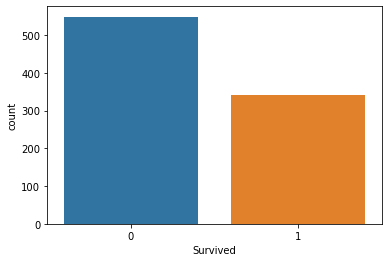

In [58]:
sns.countplot(train['Survived'])

In [75]:
print('Number of Survived: {}. Number of Not Survived: {}.'.format(len((train[train['Survived'] == 1])), 
                                                            len(train[train['Survived'] == 0])))
print('Percent of Survived: {}. Percent of Not Survived: {}.'.format(round(((len((train[train['Survived'] == 1]))/len(train))*100),2), 
                                                            round(((len((train[train['Survived'] == 0]))/len(train))*100),2)))

Number of Survived: 342. Number of Not Survived: 549.
Percent of Survived: 38.38. Percent of Not Survived: 61.62.
